<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/HW2Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1
```
# This is formatted as code
```



In [8]:
import numpy as np

def simulate_roulette_bet_on_black(n_rounds):
    """
    Simulates betting $1 on black for `n_rounds` in American roulette.

    Parameters:
    - n_rounds (int): The number of rounds to play.

    Returns:
    - total_earnings (int): The total earnings after `n_rounds` rounds.
    """
    # Probabilities for the outcomes
    prob_black = 18 / 38
    prob_red = 18 / 38
    prob_green = 2 / 38

    # Initialize total earnings to zero
    total_earnings = 0

    # Run the simulation for each round
    for _ in range(n_rounds):
        # Determine outcome based on probabilities
        outcome = np.random.choice(["Black", "Red", "Green"], p=[prob_black, prob_red, prob_green])

        # Update total earnings based on the outcome
        if outcome == "Black":
            total_earnings += 1  # Win: gain $1
        else:
            total_earnings -= 1  # Loss: lose $1

    return total_earnings

# Example usage:
n_rounds = 1000
total_earnings = simulate_roulette_bet_on_black(n_rounds)
print(f"Total earnings after {n_rounds} rounds: ${total_earnings}")


Total earnings after 1000 rounds: $-82


2-

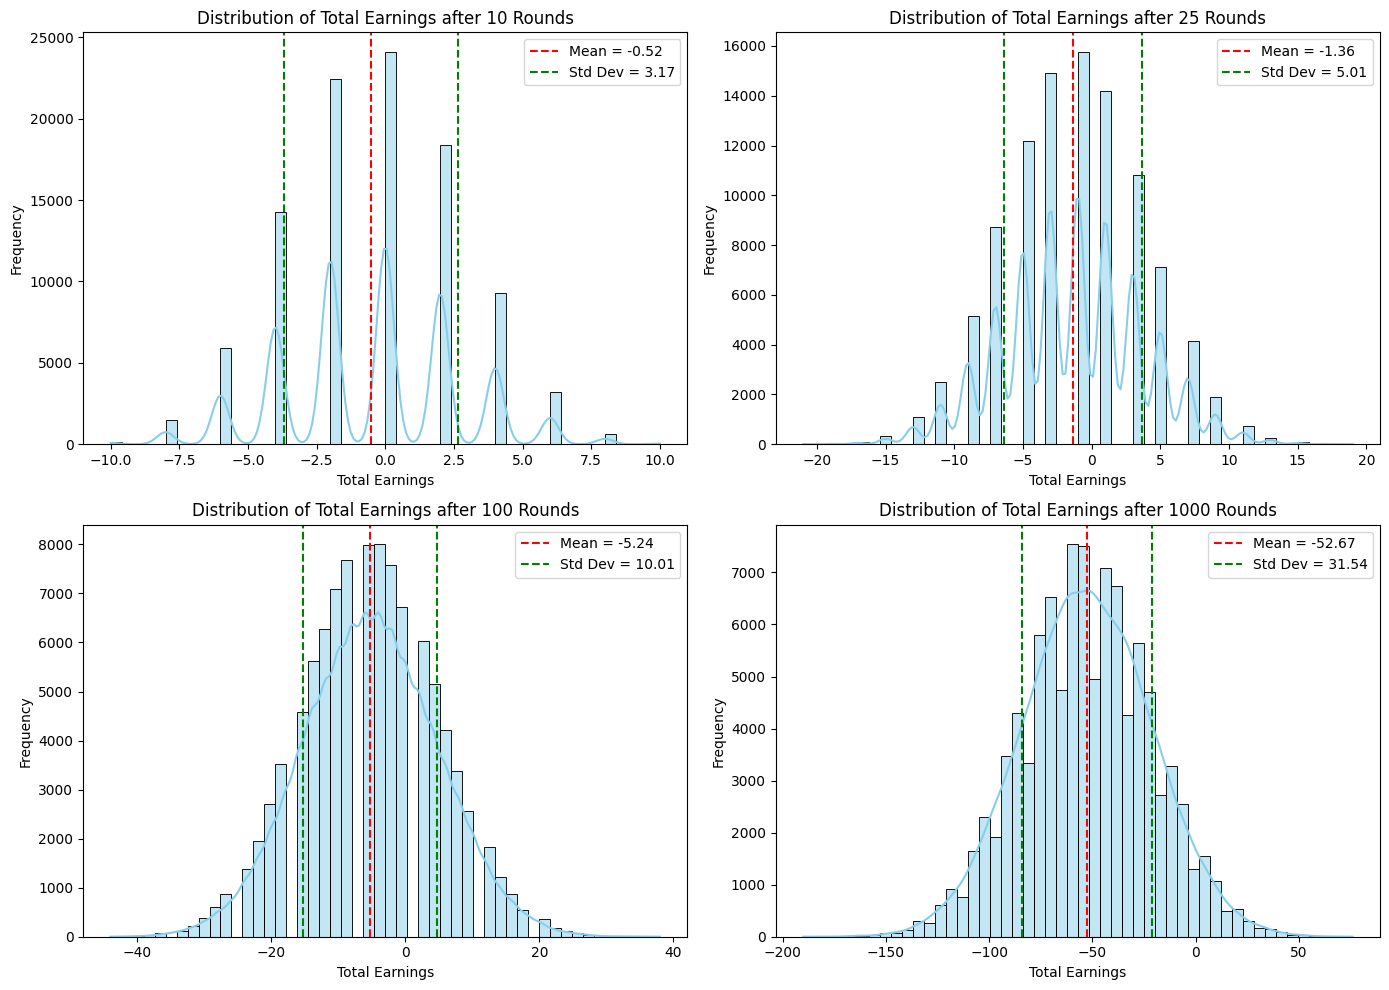

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_earnings(N, num_simulations=100000):
    """
    Simulates total earnings after N rounds for num_simulations repetitions.

    Parameters:
    - N (int): Number of rounds to bet $1 on black per simulation.
    - num_simulations (int): Number of Monte Carlo simulations.

    Returns:
    - earnings (array): Array of total earnings after N rounds for each simulation.
    """
    prob_black = 18 / 38
    prob_red_green = 1 - prob_black  # Combined probability for red and green

    # Simulate the outcomes for all simulations and rounds
    outcomes = np.random.choice([1, -1], size=(num_simulations, N), p=[prob_black, prob_red_green])

    # Calculate total earnings for each simulation
    earnings = outcomes.sum(axis=1)
    return earnings

# Set up different values for N
N_values = [10, 25, 100, 1000]
num_simulations = 100000

# Plotting settings
plt.figure(figsize=(14, 10))

for i, N in enumerate(N_values, 1):
    # Run the simulation for each N
    earnings = simulate_earnings(N, num_simulations)

    # Plot the distribution
    plt.subplot(2, 2, i)
    sns.histplot(earnings, kde=True, bins=50, color='skyblue')
    plt.title(f"Distribution of Total Earnings after {N} Rounds")
    plt.xlabel("Total Earnings")
    plt.ylabel("Frequency")

    # Calculate and display the mean and standard deviation
    mean_earnings = np.mean(earnings)
    std_earnings = np.std(earnings)
    plt.axvline(mean_earnings, color='red', linestyle='--', label=f"Mean = {mean_earnings:.2f}")
    plt.axvline(mean_earnings + std_earnings, color='green', linestyle='--', label=f"Std Dev = {std_earnings:.2f}")
    plt.axvline(mean_earnings - std_earnings, color='green', linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()


3-

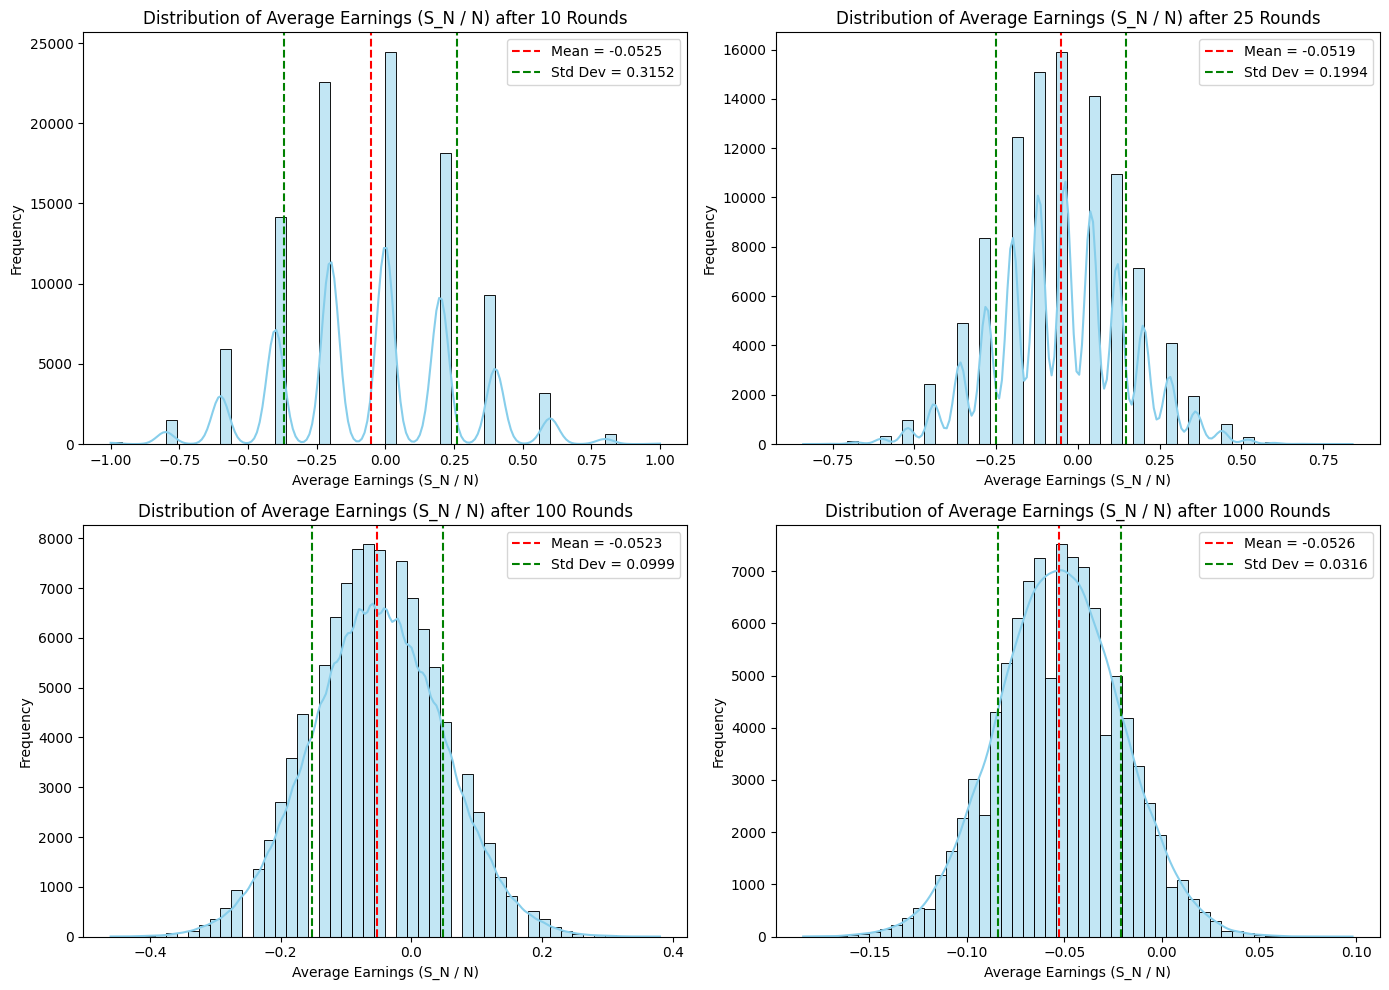

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_average_earnings(N, num_simulations=100000):
    """
    Simulates average earnings (S_N / N) after N rounds for num_simulations repetitions.

    Parameters:
    - N (int): Number of rounds to bet $1 on black per simulation.
    - num_simulations (int): Number of Monte Carlo simulations.

    Returns:
    - average_earnings (array): Array of average earnings (S_N / N) after N rounds for each simulation.
    """
    prob_black = 18 / 38
    prob_red_green = 1 - prob_black  # Combined probability for red and green

    # Simulate the outcomes for all simulations and rounds
    outcomes = np.random.choice([1, -1], size=(num_simulations, N), p=[prob_black, prob_red_green])

    # Calculate total earnings for each simulation
    total_earnings = outcomes.sum(axis=1)

    # Calculate the average earnings (S_N / N) for each simulation
    average_earnings = total_earnings / N
    return average_earnings

# Set up different values for N
N_values = [10, 25, 100, 1000]
num_simulations = 100000

# Plotting settings
plt.figure(figsize=(14, 10))

for i, N in enumerate(N_values, 1):
    # Run the simulation for each N
    average_earnings = simulate_average_earnings(N, num_simulations)

    # Plot the distribution
    plt.subplot(2, 2, i)
    sns.histplot(average_earnings, kde=True, bins=50, color='skyblue')
    plt.title(f"Distribution of Average Earnings (S_N / N) after {N} Rounds")
    plt.xlabel("Average Earnings (S_N / N)")
    plt.ylabel("Frequency")

    # Calculate and display the mean and standard deviation
    mean_earnings = np.mean(average_earnings)
    std_earnings = np.std(average_earnings)
    plt.axvline(mean_earnings, color='red', linestyle='--', label=f"Mean = {mean_earnings:.4f}")
    plt.axvline(mean_earnings + std_earnings, color='green', linestyle='--', label=f"Std Dev = {std_earnings:.4f}")
    plt.axvline(mean_earnings - std_earnings, color='green', linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()


4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_theoretical_values(N):
    # Theoretical expected value for total earnings E[S_N] = N * (-2/38)
    expected_value = N * (-2 / 38)

    # Theoretical variance for one round
    var_one_round = (18/38) * (1 + 0.0526)**2 + (20/38) * (-1 + 0.0526)**2
    # Theoretical variance for total earnings
    variance_SN = N * var_one_round

    # Theoretical standard error (standard deviation of total earnings)
    std_error_SN = np.sqrt(variance_SN)

    return expected_value, std_error_SN

def compare_theoretical_and_simulated(N_values, num_simulations=100000):
    # Run the simulation and calculate theoretical values
    theoretical_values = {}
    simulated_values = {}

    for N in N_values:
        # Run simulation to get the total earnings (S_N) from Monte Carlo
        outcomes = np.random.choice([1, -1], size=(num_simulations, N), p=[18/38, 20/38])
        total_earnings = outcomes.sum(axis=1)
        simulated_mean = np.mean(total_earnings)
        simulated_std = np.std(total_earnings)

        # Theoretical values
        theoretical_expected, theoretical_std_error = calculate_theoretical_values(N)

        # Store the results
        simulated_values[N] = (simulated_mean, simulated_std)
        theoretical_values[N] = (theoretical_expected, theoretical_std_error)

    # Print and plot the comparison
    for N in N_values:
        simulated_mean, simulated_std = simulated_values[N]
        theoretical_expected, theoretical_std_error = theoretical_values[N]

        print(f"Comparison for N = {N}:")
        print(f"  Theoretical Expected Value (E[S_N]): {theoretical_expected:.4f}")
        print(f"  Simulated Mean (E[S_N] from Monte Carlo): {simulated_mean:.4f}")
        print(f"  Theoretical Standard Error (SE[S_N]): {theoretical_std_error:.4f}")
        print(f"  Simulated Standard Error (SE[S_N] from Monte Carlo): {simulated_std:.4f}")
        print(f"  Difference in Expected Value: {abs(simulated_mean - theoretical_expected):.4f}")
        print(f"  Difference in Standard Error: {abs(simulated_std - theoretical_std_error):.4f}\n")

# Set up different values for N
N_values = [10, 25, 100, 1000]
num_simulations = 100000

# Run the comparison
compare_theoretical_and_simulated(N_values, num_simulations)


Comparison for N = 10:
  Theoretical Expected Value (E[S_N]): -0.5263
  Simulated Mean (E[S_N] from Monte Carlo): -0.5241
  Theoretical Standard Error (SE[S_N]): 3.1579
  Simulated Standard Error (SE[S_N] from Monte Carlo): 3.1553
  Difference in Expected Value: 0.0022
  Difference in Standard Error: 0.0026

Comparison for N = 25:
  Theoretical Expected Value (E[S_N]): -1.3158
  Simulated Mean (E[S_N] from Monte Carlo): -1.3025
  Theoretical Standard Error (SE[S_N]): 4.9931
  Simulated Standard Error (SE[S_N] from Monte Carlo): 4.9862
  Difference in Expected Value: 0.0133
  Difference in Standard Error: 0.0069

Comparison for N = 100:
  Theoretical Expected Value (E[S_N]): -5.2632
  Simulated Mean (E[S_N] from Monte Carlo): -5.2212
  Theoretical Standard Error (SE[S_N]): 9.9861
  Simulated Standard Error (SE[S_N] from Monte Carlo): 9.9921
  Difference in Expected Value: 0.0419
  Difference in Standard Error: 0.0059

Comparison for N = 1000:
  Theoretical Expected Value (E[S_N]): -52.6

5-


CLT Approximation: Probability that the casino loses money (S_25 > 0) is: 0.3961
Monte Carlo Simulation: Probability that the casino loses money (S_25 > 0) is: 0.3942


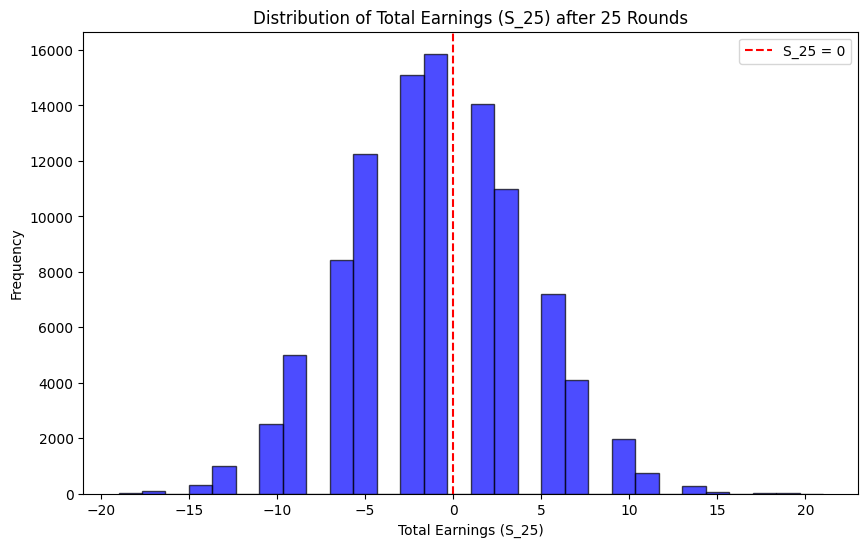

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Constants from earlier computations
p_win = 18 / 38  # Probability of winning (black)
p_lose = 20 / 38  # Probability of losing (red or green)
mean_one_round = -2 / 38  # Mean earnings for one round
var_one_round = (p_win * (1 + 0.0526)**2 + p_lose * (-1 + 0.0526)**2)  # Variance of one round

# For N = 25
N = 25
mean_SN = N * mean_one_round  # Mean of total earnings after N rounds
std_SN = np.sqrt(N * var_one_round)  # Standard deviation of total earnings after N rounds

# CLT Approximation: P(S_25 > 0)
z_score = (0 - mean_SN) / std_SN  # Standardized score for S_25 > 0
prob_CLT = 1 - stats.norm.cdf(z_score)  # Using the CDF of the standard normal distribution

print(f"CLT Approximation: Probability that the casino loses money (S_25 > 0) is: {prob_CLT:.4f}")

# Monte Carlo Simulation
num_simulations = 100000
outcomes = np.random.choice([1, -1], size=(num_simulations, N), p=[p_win, p_lose])
total_earnings = outcomes.sum(axis=1)
prob_simulation = np.mean(total_earnings > 0)

print(f"Monte Carlo Simulation: Probability that the casino loses money (S_25 > 0) is: {prob_simulation:.4f}")

# Plotting the distribution of total earnings from the simulation
plt.figure(figsize=(10, 6))
plt.hist(total_earnings, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', label="S_25 = 0")
plt.title('Distribution of Total Earnings (S_25) after 25 Rounds')
plt.xlabel('Total Earnings (S_25)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


6-

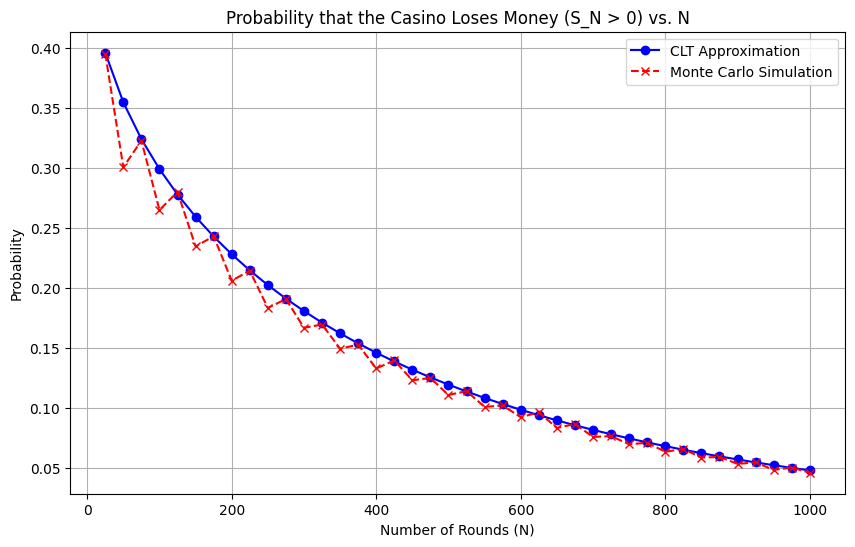

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Constants from previous computations
p_win = 18 / 38  # Probability of winning (black)
p_lose = 20 / 38  # Probability of losing (red or green)
mean_one_round = -2 / 38  # Mean earnings for one round
var_one_round = (p_win * (1 + 0.0526)**2 + p_lose * (-1 + 0.0526)**2)  # Variance for one round

# Function to calculate CLT probability for casino losing money (S_N > 0)
def clt_probability(N, mean_one_round, var_one_round):
    mean_SN = N * mean_one_round
    std_SN = np.sqrt(N * var_one_round)
    z_score = (0 - mean_SN) / std_SN
    return 1 - stats.norm.cdf(z_score)

# Monte Carlo simulation to estimate P(S_N > 0)
def monte_carlo_simulation(N, p_win, p_lose, num_simulations=100000):
    outcomes = np.random.choice([1, -1], size=(num_simulations, N), p=[p_win, p_lose])
    total_earnings = outcomes.sum(axis=1)
    return np.mean(total_earnings > 0)

# Range of N values
N_values = np.arange(25, 1001, 25)

# Arrays to store probabilities
clt_probabilities = []
mc_probabilities = []

# Perform CLT approximation and Monte Carlo simulation for each N
for N in N_values:
    clt_prob = clt_probability(N, mean_one_round, var_one_round)
    mc_prob = monte_carlo_simulation(N, p_win, p_lose)
    clt_probabilities.append(clt_prob)
    mc_probabilities.append(mc_prob)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, clt_probabilities, label='CLT Approximation', color='b', linestyle='-', marker='o')
plt.plot(N_values, mc_probabilities, label='Monte Carlo Simulation', color='r', linestyle='--', marker='x')
plt.title('Probability that the Casino Loses Money (S_N > 0) vs. N')
plt.xlabel('Number of Rounds (N)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()
